# Статистические методы в биоинформатике
## Домашнее задание 2

**Правила:**

* Дедлайн **10 мая 23:59**.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[smb] Фамилия Имя - задание 2"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов).
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.
* За задание можно получить **40 баллов**.

In [1]:
                                                                                                                                                                                                                                import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Датасет
Для анализа будет использоваться датасет экспресии генов в нормальных тканях и в карционмах, полученные c помощью нуклеотидных микрочипов. Данные опубликованы в работе Notterman, et al, Cancer Research vol. 61: 2001
Всего доступна информация о 18 опухолевых образцах и о соответсвующих им здоровых тканях.


### Шаг 1. Загрузка и подготовка датасета
Загрузим данные

In [2]:
! wget http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
! unzip CarcinomaNormalDatasetCancerResearchText.zip

--2019-05-11 19:09:18--  http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
Resolving genomics-pubs.princeton.edu (genomics-pubs.princeton.edu)... 128.112.116.251
Connecting to genomics-pubs.princeton.edu (genomics-pubs.princeton.edu)|128.112.116.251|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549752 (537K) [application/zip]
Saving to: ‘CarcinomaNormalDatasetCancerResearchText.zip.1’

CarcinomaNormalData 100%[===================>] 536,87K   825KB/s    in 0,7s    

2019-05-11 19:09:19 (825 KB/s) - ‘CarcinomaNormalDatasetCancerResearchText.zip.1’ saved [549752/549752]

Archive:  CarcinomaNormalDatasetCancerResearchText.zip
replace CarcinomaNormalDatasetCancerResearch.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
data=pd.read_table("CarcinomaNormalDatasetCancerResearch.txt", skiprows=range(1,8), index_col=0)

Взглянем на данные:

In [3]:
data.head()

,Description,Sample,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,...,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40,T-Test tumor vs. normal,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
Accession Number,,,,,,,,,,,,,,,,,,,,,
X53416,Human mRNA for actin-binding protein (filamin)...,NaN,70.0,108.0,75.0,871.0,-92.0,21.0,225.0,-346.0,...,488.0,164.0,1282.0,68.0,928.0,0.0000,NaN,NaN,NaN,NaN
M83670,"""Human carbonic anhydrase IV mRNA, complete cds""",NaN,-81.0,-30.0,-1.0,4.0,-34.0,-13.0,118.0,-35.0,...,564.0,330.0,116.0,718.0,332.0,0.0000,NaN,NaN,NaN,NaN
X90908,H.sapiens mRNA for I-15P (I-BABP) protein,NaN,25.0,-7.0,5.0,14.0,14.0,5.0,-5.0,37.0,...,-29.0,-13.0,-4.0,-50.0,4.0,0.3694,NaN,NaN,NaN,NaN
M97496,"""Homo sapiens guanylin mRNA, complete cds""",NaN,10.0,60.0,48.0,78.0,19.0,11.0,175.0,42.0,...,1303.0,721.0,542.0,1816.0,412.0,0.0000,NaN,NaN,NaN,NaN
X90908,H.sapiens mRNA for I-15P (I-BABP) protein,NaN,22.0,0.0,6.0,-6.0,11.0,-18.0,-40.0,39.0,...,-9.0,12.0,0.0,-28.0,0.0,0.3492,NaN,NaN,NaN,NaN


Каждый ряд соответствует какому-то из интересующих нас генов, а колонка (не считая тех, которые содержат описание гена, его номер и значение T-test`а между экспрессией в опухолевых и нормальных образцах) - данные об экспресии каждого гена в опухолевых (Tumor) и контролей (Normal) 

Видно, что из-за формата скачанного датасета в конце таблицы получилось несколько пустых колонок. Избавимся от них

In [3]:
# удаляем все ненужные стоблцы
data = data.drop(data.columns[-4:-1], axis=1)
data = data.drop(['Sample'], axis=1)
data = data.drop(data.columns[-1], axis=1)
data.dropna(inplace=True)

In [5]:
data.head()

,Description,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,...,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40,T-Test tumor vs. normal
Accession Number,,,,,,,,,,,,,,,,,,,,,
X53416,Human mRNA for actin-binding protein (filamin)...,70.0,108.0,75.0,871.0,-92.0,21.0,225.0,-346.0,-378.0,...,1412.0,1122.0,644.0,1760.0,488.0,164.0,1282.0,68.0,928.0,0.0000
M83670,"""Human carbonic anhydrase IV mRNA, complete cds""",-81.0,-30.0,-1.0,4.0,-34.0,-13.0,118.0,-35.0,31.0,...,288.0,416.0,625.0,320.0,564.0,330.0,116.0,718.0,332.0,0.0000
X90908,H.sapiens mRNA for I-15P (I-BABP) protein,25.0,-7.0,5.0,14.0,14.0,5.0,-5.0,37.0,-29.0,...,-21.0,-7.0,-28.0,-8.0,-29.0,-13.0,-4.0,-50.0,4.0,0.3694
M97496,"""Homo sapiens guanylin mRNA, complete cds""",10.0,60.0,48.0,78.0,19.0,11.0,175.0,42.0,105.0,...,731.0,1559.0,1762.0,917.0,1303.0,721.0,542.0,1816.0,412.0,0.0000
X90908,H.sapiens mRNA for I-15P (I-BABP) protein,22.0,0.0,6.0,-6.0,11.0,-18.0,-40.0,39.0,-54.0,...,8.0,5.0,-7.0,-2.0,-9.0,12.0,0.0,-28.0,0.0,0.3492


Явно укажем вещественный тип данных

In [4]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype('float')

Проверим, уникальны ли все образцы в датасете, для этого сравним количество уникальных ID генов с количеством рядов:

In [5]:
len(np.unique(data.index)), len(data.index)

(6603, 7463)

Некоторые эксперименты повторялись более одного раза. Оставим те, где средний уровень экспрессии выше.

In [6]:
data['mean_expr'] = data.iloc[:, 1:-1].mean(axis=1)
data.sort_values(by=['mean_expr'], ascending=False)
data = data.groupby('Accession Number').first()

Сохраним описания генов и данные по их экспрессии отдельно. Значение t-теста и средней экспрессии нам не нужны, поэтому избавимся от них

In [7]:
expr_data, descr = data.drop(['Description', 
                              'T-Test tumor vs. normal', 
                              'mean_expr'], 
                             axis = 1), \
                    data.Description

In [8]:
expr_data.head()

,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,Tumor 32,...,Normal 4,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40
Accession Number,,,,,,,,,,,,,,,,,,,,,
BioB,-2.0,-11.0,-17.0,-1.0,-14.0,-8.0,-13.0,31.0,-24.0,-17.0,...,-23.0,-10.0,-13.0,-25.0,-12.0,-10.0,3.0,-3.0,-24.0,-14.0
BioC,12.0,9.0,17.0,18.0,10.0,53.0,-2.0,57.0,-15.0,54.0,...,-16.0,13.0,14.0,-10.0,14.0,-18.0,75.0,-20.0,22.0,3.0
BioD,107.0,65.0,108.0,95.0,94.0,473.0,93.0,161.0,60.0,232.0,...,58.0,104.0,117.0,142.0,123.0,207.0,461.0,137.0,289.0,82.0
D00003,2.0,7.0,1.0,-3.0,0.0,10.0,15.0,-2.0,36.0,-1.0,...,626.0,0.0,0.0,74.0,4.0,13.0,24.0,4.0,4.0,-1.0
D00015,26.0,13.0,13.0,9.0,2.0,10.0,20.0,17.0,21.0,17.0,...,24.0,79.0,22.0,52.0,59.0,40.0,42.0,71.0,43.0,60.0


Для удобства работы транспонируем матрицу данных об экспрессии, и разметим для каждой строки, является ли образец опухолевым или нормой

In [9]:
expr_data = expr_data.T

In [12]:
expr_data.head()

Accession Number,BioB,BioC,BioD,D00003,D00015,D00102,D00137,D00173,D00265,D00306,...,Z50194,Z50753,Z50788,b-actin-3,b-actin-5,b-actin-M,cre,gapdh-3,gapdh-5,gapdh-M
Tumor 27,-2.0,12.0,107.0,2.0,26.0,5.0,18.0,1.0,153.0,-7.0,...,6.0,35.0,-1.0,797.0,559.0,849.0,246.0,1214.0,676.0,873.0
Tumor 29,-11.0,9.0,65.0,7.0,13.0,2.0,13.0,5.0,145.0,-7.0,...,19.0,26.0,3.0,1298.0,409.0,1093.0,414.0,1394.0,477.0,609.0
Tumor 34,-17.0,17.0,108.0,1.0,13.0,0.0,11.0,10.0,132.0,-6.0,...,2.0,25.0,1.0,862.0,667.0,961.0,449.0,1252.0,635.0,754.0
Tumor 28,-1.0,18.0,95.0,-3.0,9.0,10.0,28.0,8.0,73.0,-17.0,...,23.0,41.0,-2.0,1047.0,643.0,1100.0,369.0,1313.0,785.0,1013.0
Tumor 35,-14.0,10.0,94.0,0.0,2.0,-5.0,6.0,10.0,184.0,10.0,...,-1.0,29.0,2.0,1253.0,437.0,844.0,345.0,1292.0,497.0,669.0


 С помощью функции map осуществите разметку данных (-1 - опухолевые, 1 - здоровые)

In [10]:
#your code here
def map_func(string):
    if string.startswith("Tumor"):
        return -1
    if string.startswith("Normal"):
        return 1
arr = list(expr_data.index)
mapped = list(map(map_func, arr))
expr_data["Map"] = mapped

In [11]:
expr_data.head()

Accession Number,BioB,BioC,BioD,D00003,D00015,D00102,D00137,D00173,D00265,D00306,...,Z50753,Z50788,b-actin-3,b-actin-5,b-actin-M,cre,gapdh-3,gapdh-5,gapdh-M,Map
Tumor 27,-2.0,12.0,107.0,2.0,26.0,5.0,18.0,1.0,153.0,-7.0,...,35.0,-1.0,797.0,559.0,849.0,246.0,1214.0,676.0,873.0,-1
Tumor 29,-11.0,9.0,65.0,7.0,13.0,2.0,13.0,5.0,145.0,-7.0,...,26.0,3.0,1298.0,409.0,1093.0,414.0,1394.0,477.0,609.0,-1
Tumor 34,-17.0,17.0,108.0,1.0,13.0,0.0,11.0,10.0,132.0,-6.0,...,25.0,1.0,862.0,667.0,961.0,449.0,1252.0,635.0,754.0,-1
Tumor 28,-1.0,18.0,95.0,-3.0,9.0,10.0,28.0,8.0,73.0,-17.0,...,41.0,-2.0,1047.0,643.0,1100.0,369.0,1313.0,785.0,1013.0,-1
Tumor 35,-14.0,10.0,94.0,0.0,2.0,-5.0,6.0,10.0,184.0,10.0,...,29.0,2.0,1253.0,437.0,844.0,345.0,1292.0,497.0,669.0,-1


In [12]:
expr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Tumor 27 to Normal 40
Columns: 6604 entries, BioB to Map
dtypes: float64(6603), int64(1)
memory usage: 1.8+ MB


Значения дифференциальной эскпрессии гена в образцах могут быть крайне различны. 
Для каждого гена можно характеризовать разброс экспрессии как среднее, максимум и минимум (отдельно в опухолевых и в контролях). Постройте гистограммы этих значений в опухолевых образцах и в контролях. 

In [13]:
# your code here
mean_norm = []
max_norm = []
min_norm = []
max_tum = []
min_tum = []
mean_tum = []
for gene in list(expr_data):
    mean_norm.append(expr_data[gene][expr_data["Map"]==1].mean())
    max_norm.append(expr_data[gene][expr_data["Map"]==1].max())
    min_norm.append(expr_data[gene][expr_data["Map"]==1].min())
    mean_tum.append(expr_data[gene][expr_data["Map"]==-1].mean())
    max_tum.append(expr_data[gene][expr_data["Map"]==-1].max())
    min_tum.append(expr_data[gene][expr_data["Map"]==-1].min())

In [17]:
N_bins = 100

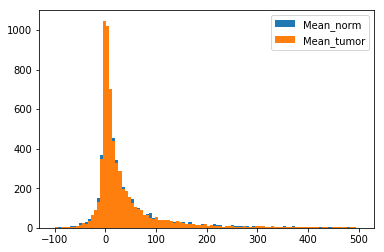

In [18]:
plt.hist(mean_norm, bins=N_bins, label="Mean_norm", range=[-100,500])
plt.hist(mean_tum, bins=N_bins, label="Mean_tumor", range=[-100,500])
plt.legend()
plt.show()

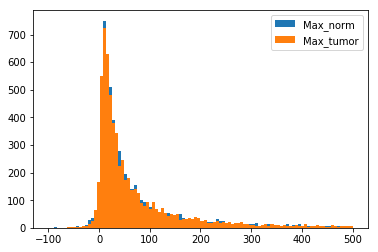

In [20]:
plt.hist(max_norm, bins=N_bins, label="Max_norm", range=[-100,500])
plt.hist(max_tum, bins=N_bins, label="Max_tumor", range=[-100,500])
plt.legend()
plt.show()

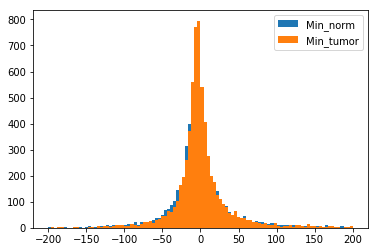

In [19]:
plt.hist(min_norm, bins=N_bins, label="Min_norm", range=[-200,200])
plt.hist(min_tum, bins=N_bins, label="Min_tumor", range=[-200,200])
plt.legend()
plt.show()

Все распределения очень похожи

## 1. Предварительная визуализация

Посмотрим на значения экспрессии случайного гена

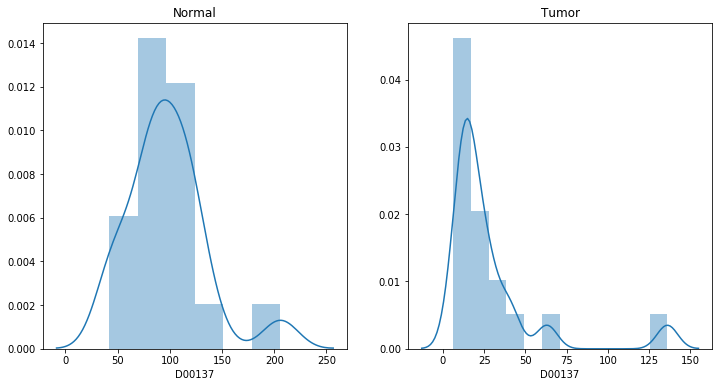

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(expr_data[expr_data["Map"]==1].iloc[:, 6], kde=True)
plt.title('Normal')
plt.subplot(122)
sns.distplot(expr_data[expr_data["Map"]==-1].iloc[:, 6], kde=True)
plt.title('Tumor');

Сравним плотности этих распределений с помощью kdeplot и разброс значений с помощью боксплотов:

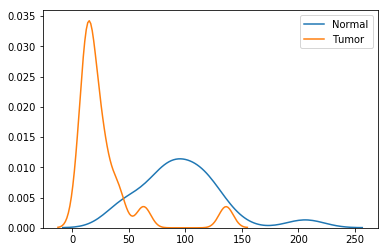

In [21]:
sns.kdeplot(expr_data[expr_data["Map"]==1].iloc[:, 6], label="Normal")
sns.kdeplot(expr_data[expr_data["Map"]==-1].iloc[:, 6], label="Tumor")
plt.show()

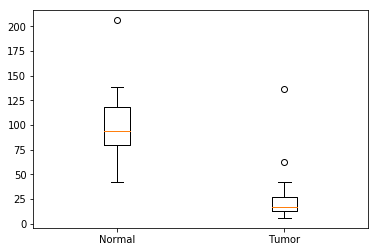

In [22]:
fig, ax = plt.subplots()
pos = ["Normal", "Tumor"]
bp = ax.boxplot([expr_data[expr_data["Map"]==1].iloc[:, 6], expr_data[expr_data["Map"]==-1].iloc[:, 6]])
ax.set_xticklabels(pos)
plt.show()

На графиках видно, что для одного случайного гена профили экспрессии возможно различаются.  
Но насколько это статистически доставерно и такова ли эта картина в целом?   
  
  
Для продолжения анализа необходимо понять, как именно были получены данные. Для этого обратимся к статье:  
_Gene intensity information was converted to a mean intensity for each gene by proprietary software (Affymetrix), which includes routines for filtering and centering the data (in these experiments, to 50 intensity units). Expression of genes related to smooth muscle and connective tissue was consistently greater in the normal than the tumor samples, probably because of the greater heterogeneity of tissue type in the normal samples_

Видим, что нормализация данных уже выполнена.
Во многих случаях для визуализации удобно переходить к логарифмическому формату данных.

## 2. Анализ распределений

Предварительный зрительный анализ может сказать очень многое о том, как устроены наши данные. Тем не менее, для получения полной картины простого взгрляда на данные недостаточно. Первое на что нужно обрать внимание - это параметры распределения. Все распределения в первую очередь характеризуются медианой и средним. Объясните разницу между ними. Для гена 'D00137' вычислите медиану и средний уровень мРНК в опухолевых и нормальных тканей.
  

Ответ:

Медиана и среднее различаются, что среднее зависит от значений в выборке, а медиана только от их ранжирования

Среднее, например, чувствительно к выбросам, а медиана нет

In [23]:
#your code here
print("Normal mean = ", expr_data["D00137"][expr_data["Map"]==1].mean())
print("Tumor mean = ", expr_data["D00137"][expr_data["Map"]==-1].mean())

Normal mean =  97.0
Tumor mean =  28.166666666666668


In [24]:
print("Normal median = ", expr_data["D00137"][expr_data["Map"]==1].median())
print("Tumor median = ", expr_data["D00137"][expr_data["Map"]==-1].median())

Normal median =  94.0
Tumor median =  17.0


Видно, что сдвиг между медианой и средним и нормальных гораздо меньше, чем у опухолевых

Как можно увидеть из ядерноой оценки плотности и боксплота, у опухоли больше выбросов, распределение менее "однородное" чем этот сдвиг и объясняется

## 3. Проверка статистических гипотез

Для того, чтобы утверждать, что "ген X овер-экспрессирован в опухолевых образцах", недостаточно просто посмотреть на боксплоты, необходимо провести статистический анализ

Анализ одного гена 3:  
    $\mathsf{H}_0\colon$ для гена H.sapiens mRNA for I-15P (I-BABP) protein диф экспрессия не наблюдается;  
    $\mathsf{H}_1\colon$ для гена H.sapiens mRNA for I-15P (I-BABP) protein диф экспрессия наблюдается.

Какой тест стоит выбрать для проверки того, одинаковые ли профили экспрессии в нормальных и опухолевых образцах? (предположим, что эти распределения - нормальны)?  
Реализуйте его с помощью пакета `scipy`.

В предположении нормальности распределений можно пользоваться критерием Стьюдента, но с учетом возможной различности вариаций

In [25]:
#your answer here
scp.stats.ttest_ind(expr_data["D00137"][expr_data["Map"]==1], expr_data["D00137"][expr_data["Map"]==-1], axis=0, equal_var=False)

Ttest_indResult(statistic=5.985803078987308, pvalue=1.0869056401678417e-06)

Интерпретируйте результаты:

    #your text here
    p-value << 0.05, так что можно сделать вывод, что рез-тат статистически значим и профили в нормльных и опухолевых образцах различны 

Давайте проверим, что наши данные действительно разделяются на два разных распределения. Для этого проверим, как будет работать этот же метод, если случайным образом перемешать метки подгрупп. Реализуйте случайное сэмплирование с помощью функции `random.choice` из библиотеки `numpy` и посмотрите, как изменится p-value (и изменится ли).

In [26]:
#your code here
arr_merged = expr_data["D00137"][expr_data["Map"]==1].append(expr_data["D00137"][expr_data["Map"]==-1])
len1 = len(expr_data["D00137"][expr_data["Map"]==1])
length = len(arr_merged)

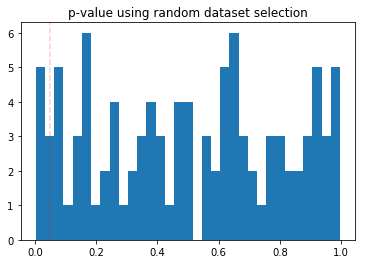

In [120]:
N_trials = 100
p_values = []
for j in range(N_trials):
    labels1 = np.random.choice(length, len1, replace=False)
    labels2 = []
    for i in range(length):
        if i not in labels1:
            labels2.append(i)
    #for i in np.random.choice(length, len1):
    data1 = arr_merged[labels1]
    data2 = arr_merged[labels2]
    p_values.append(scp.stats.ttest_ind(data1, data2, axis=0, equal_var=False)[1])
plt.hist(p_values, bins=int(N_trials/3))
plt.title("p-value using random dataset selection")
plt.axvline(0.05, color="red", ls="dashed", alpha=0.2)
plt.show()

#your text here

Как видно из распределения p-values, полученных случайной генерацией двух выборок изначальных размеров из первоначальных значений, подавляющее кол-во раз p-value > и даже >> 0.05, так что распределения действительно разные

И, наконец, самое интересное. Посчитайте, в каком проценте генов, для которых с уровнем значимости 0.05 наблюдается овер-экспрессия в опухолевых тканях.
При этом важно выполнить поправку на множественное тестирование.  
Сначала реализуйте T-test и поправку Бонферрони самостоятельно, затем - воспользуйтесь функциями из пакетов `scipy` или `statmodels`.

Объясните, зачем необходимо выполнять поправку на множественное тестирование:

#your text here

Так как для каждого гена мы вводим гипотезу наличия оверэкспрессии, при проверке большого кол-ва таких гипотез на уровне $\alpha$ вероятность того, что хотя бы одна из гипотез будет отвергнута с ошибкой первого рода будет $1-(1-\alpha)^N$, что быстро растет с ростом $N$ - кол-ва гипотез

Для поддержания этого уровня на требуемом $\alpha$ для всего набора гипотез и вводятся поправки

Посмотрим, можно ли вообще считать распределения нормальными (чтобы потом использовать Welch's test)

In [25]:
list1 = []
list2 = []
for gene in list(expr_data):
    if gene != "Map":
        list1.append(float(scp.stats.shapiro(expr_data[gene][expr_data["Map"]==1])[1]))
        list2.append(float(scp.stats.shapiro(expr_data[gene][expr_data["Map"]==-1])[1]))

27.290625473269724 %


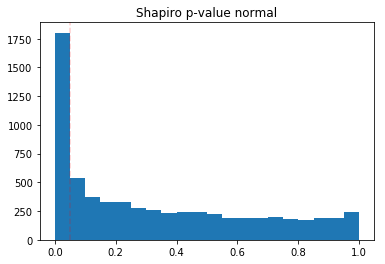

In [29]:
num1 = 0
for i in range(len(list1)):
    if list1[i] < 0.05:
        num1 += 1
print(num1/len(list1)*100, "% less 0.05")

plt.hist(list1, bins=20)
plt.title("Shapiro p-value normal")
plt.axvline(0.05, color="red", ls="dashed", alpha=0.2)
plt.show()

25.927608662729064 % less 0.05


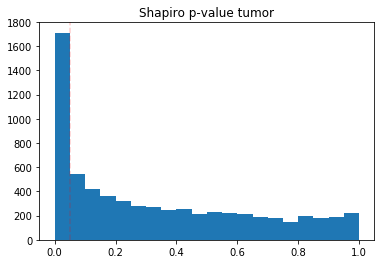

In [30]:
num2 = 0
for i in range(len(list2)):
    if list2[i] < 0.05:
        num2 += 1
print(num2/len(list2)*100, "% less 0.05")

plt.hist(list2, bins=20)
plt.title("Shapiro p-value tumor")
plt.axvline(0.05, color="red", ls="dashed", alpha=0.2)
plt.show()

Видно, что четверть всех распределений проходят тест Шапиро, а остальные распределены по p-value достаточно равномерно. В принципе, можно посчитать, что всё более или менее нормально и дальше использовать соотв. тесты

In [217]:
#Welch's t-test (~Student's for different variances)
def test_custom(a, b):
    #your code here
    a1 = float(a.size)
    b1 = float(b.size)
    tt = (a.mean() - b.mean())/(np.sqrt(a.var()/a1 + b.var()/b1))
    dof = (a.var()/a1 + b.var()/b1)**2 / (float((a.var()/a1)**2 / float(a1-1) + (b.var()/b1)**2 / float(b1-1)))
    pval = 2 * (1 - scp.stats.t.cdf(abs(tt), dof))
    return (tt, pval)

Т.к. знак Т-теста совпадает с выражением того, что в среднем есть овер или андерэкспрессия, то будем сразу отсекать в выборку те p-value, где в среднем в опухоли больше экспрессируется 

(иначе даже при значимом отличии получим недоэкспрессию в любом случае)

Это, конечно, является некоторой преобработкой данных, но ведь иначе замусоривание данных недоэкспрессируемыми генами будет вести к уменьшению кол-ва значимых оверэкспрессий, что тоже нехорошо

Плюс во встроенные мультитесты надо на вход подавать список p-values, то есть придется производить отбор уже скорректированных p-values, помня о том, была ли до этого овер- или андер-экспрессия. И это будет "выкидыванием" данных, где мы заведомо знаем, что нет оверэкспрессии, но которые при этом использовались для получения полезных

(было бы более понятно, если спрашивали бы просто кол-во генов со статистически значимыми различиями в экспрессии)

In [213]:
def bonferroni_custom(p_vals, overunder):
    #your code here
    accepted_over = 0
    for ind, p_value in enumerate(p_vals):
        if p_value*len(p_vals) < alpha:
             accepted_over += 1
    return accepted_over

In [214]:
#your code here
alpha = 0.05
overunder = []
p_vals_custom = []
dif_expr = 0
for gene in list(expr_data):
    if gene != "Map":
        res = test_custom(expr_data[gene][expr_data["Map"]==1], expr_data[gene][expr_data["Map"]==-1])
        if res[1] < 0.05:
            dif_expr += 1
        overunder.append(res[0] < 0)
        #test for over- and not underexpression
        if res[0] < 0:
            p_vals_custom.append(res[1])

accepted = bonferroni_custom(p_vals_custom, overunder)

print("Different expressions using rough alpha=0.05:", dif_expr)
print("Overexpressions ", accepted)

Different expressions using rough alpha=0.05: 1626
Overexpressions  50


Сравним наши результаты с полученными с использованием встроенного пакета

In [215]:
def my_t_check(a, b):
    p = scp.stats.ttest_ind(a, b, axis=0, equal_var=False)[1]
    return p

Непоправленные p-values

In [216]:
#your code here
p_vals_all = []
p_vals = []
n_of_overexpr = 0
rough_diff = 0
for gene in list(expr_data):
    if gene != "Map":
        p_value = my_t_check(expr_data[gene][expr_data["Map"]==1], expr_data[gene][expr_data["Map"]==-1])
        #check that it is over- and not underexpression (there is ~3600 under and ~3400 over)
        if (expr_data[gene][expr_data["Map"]==1].mean() < expr_data[gene][expr_data["Map"]==-1].mean()):
            p_vals.append(p_value)
            n_of_overexpr += 1
        if p_value < 0.05:
            rough_diff += 1
        p_vals_all.append(p_value)

In [218]:
print("Overall genes", len(p_vals_all))
print("\"Rough different\" expressions ", rough_diff)
print("\"Rough\" overexpressions, maybe not significant ", n_of_overexpr)

Overall genes 6603
"Rough different" expressions  1626
"Rough" overexpressions, maybe not significant  3425


Проверим разницу между нашими и полученными встроенным пакетом p-values

In [228]:
diff_p = []
for i in range(len(p_vals)):
    #print(p_vals[i] - p_vals_custom[i])
    diff_p.append(p_vals[i] - p_vals_custom[i])

In [229]:
print(max(diff_p))

4.440892098500626e-16


То есть т-значения совпадают с "пакетными"

Постройте гистограмму полученных значений p-value.

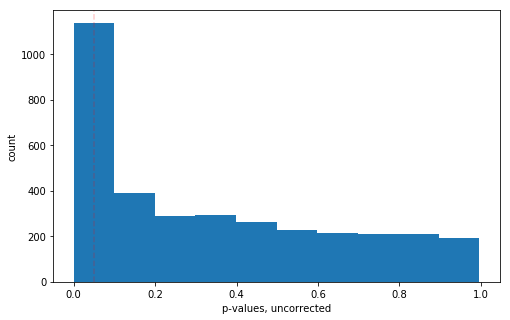

In [221]:
plt.figure(figsize=(8, 5))
plt.hist(p_vals)
plt.xlabel("p-values, uncorrected")
plt.ylabel("count")
plt.axvline(0.05, color="red", ls="dashed", alpha=0.2)

In [222]:
from statsmodels.stats import multitest
p_vals_adjusted = multitest.multipletests(p_vals, method='bonferroni')[1] #your code here

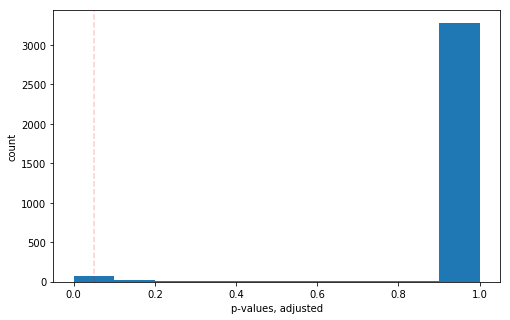

In [223]:
plt.figure(figsize=(8, 5))
plt.hist(p_vals_adjusted)
plt.xlabel("p-values, adjusted")
plt.ylabel("count")
plt.axvline(0.05, color="red", ls="dashed", alpha=0.2)

Выведем процент (и абсолютное число) генов для которых можно отвергнуть нулевую гипотезу:

In [224]:
#your code here
a = p_vals_adjusted < 0.05
print("Bonferroni")
print(sum(a), "genes")
print(sum(a)/len(a)*100, "% of not underexpressed, ", sum(a)/len(p_vals_all)*100, "% of all genes")

Bonferroni
50 genes
1.4598540145985401 % of not underexpressed,  0.7572315614114796 % of all genes


Получились одинаковые результаты (50 генов из 6604 всего) при использовании соответственно встроенного метода и самописного

Проверьте другие известные вам поправки на множественное тестирование из пакета `scipy`. Объясните, какая подходит лучше всего

In [225]:
#your code here
p_vals_adjusted_1 = multitest.multipletests(p_vals, method='holm')[1]
a = p_vals_adjusted_1 < 0.05
print("Holm")
print(sum(a), "genes")
print(sum(a)/len(a)*100, "% of not underexpressed, ", sum(a)/len(p_vals_all)*100, "% of all genes")

Holm
50 genes
1.4598540145985401 % of not underexpressed,  0.7572315614114796 % of all genes


In [226]:
p_vals_adjusted_2 = multitest.multipletests(p_vals, method='holm-sidak')[1]
a = p_vals_adjusted_2 < 0.05
print("Holm-Sidak")
print(sum(a), "genes")
print(sum(a)/len(a)*100, "% of not underexpressed, ", sum(a)/len(p_vals_all)*100, "% of all genes")

Holm-Sidak
51 genes
1.489051094890511 % of not underexpressed,  0.7723761926397091 % of all genes


In [119]:
p_vals_adjusted_3 = multitest.multipletests(p_vals, method='simes-hochberg')[1]
a = p_vals_adjusted_3 < 0.05
print("Simes-Hochberg")
print(sum(a), "genes")
print(sum(a)/len(a)*100, "% of not underexpressed, ", sum(a)/len(p_vals_all)*100, "% of all genes")

Simes-Hochberg
50 genes
1.4598540145985401 % of not underexpressed,  0.7571168988491823 % of all genes


In [159]:
p_vals_adjusted_4 = multitest.multipletests(p_vals, method='hommel')[1]
a = p_vals_adjusted_4 < 0.05
print("Hommel")
print(sum(a), "genes")
print(sum(a)/len(a)*100, "% of not underexpressed, ", sum(a)/len(p_vals_all)*100, "% of all genes")

Hommel
51 genes
1.489051094890511 % of not underexpressed,  0.7722592368261659 % of all genes


Встроенные тесты дают практически одинаковые результаты. Консервативный метод Бонферрони, возможно, наиболее хороший, если учесть, что остальные (вроде как) сильно полагаются на независимость выборок в сравнении, а для опухоли это может быть не так, т.к. там может быть много сильно экспрессируемых генов, если то опухоль. То есть появляется зависимость

Хотя, как видно из рез-татов, относительно немного генов можно назвать оверэкспрессируемыми,то есть в целом выборку можно считать независимой, так что, вероятно, и все остальные тесты работают (что подтверждается в том числе одинаковостью рез-татов)

## 4. Немного поближе взглянем на результаты

Посмотрим, какие же гены оверэкспрессированы.

In [101]:
for name, function in zip(expr_data.columns[np.where([p_vals_adjusted < 0.05])[1]], 
                          descr[np.where([p_vals_adjusted < 0.05])[1]]):
    print(name + ": " + function)

D13292: Human mRNA for ryudocan core protein
D16350: "Human SA mRNA for SA gene product, complete cds"
D16362: "Human DNA for plasma glutathione peroxidase, exon 3, 4 and 5"
D26135: "Human mRNA for diacylglycerol kinase gamma, complete cds"
D42039: "Human mRNA for KIAA0081 gene, partial cds"
H03945: yj44c02.s1 Homo sapiens cDNA clone 151586 3'
H04235: yj46b05.s1 Homo sapiens cDNA clone 151761 3' similar to gb:J05582 MUCIN 1 PRECURSOR (HUMAN);
H08056: yl86a10.s1 Homo sapiens cDNA clone 44916 3'
H17124: ym42e02.s1 Homo sapiens cDNA clone 50865 3'
H44007: yp18e03.s1 Homo sapiens cDNA clone 187804 3'
H50623: "yp07f12.s1 Homo sapiens cDNA clone 186767 3' similar to gb:M16941 HLA CLASS II HISTOCOMPATIBILITY ANTIGEN, DR-7 BETA CHAIN (HUMAN);"
H51221: yo33h06.s1 Homo sapiens cDNA clone 179771 3'
H54446: yq91f03.s1 Homo sapiens cDNA clone 203165 3' similar to gb:M63175 AUTOCRINE MOTILITY FACTOR RECEPTOR PRECURSOR (HUMAN);
H60597: yr41h04.s1 Homo sapiens cDNA clone 207895 3' similar to contains 

Визуализируем различия в экспресии 20 самых оверэкспрессированных генов с помощью функции `barplot` из библиотеки `seaborn`.

In [102]:
top_20_genes = expr_data.columns[np.argsort(p_vals_adjusted, )[:10]]

In [103]:
top_20_genes_expr = expr_data.loc[:,top_20_genes]

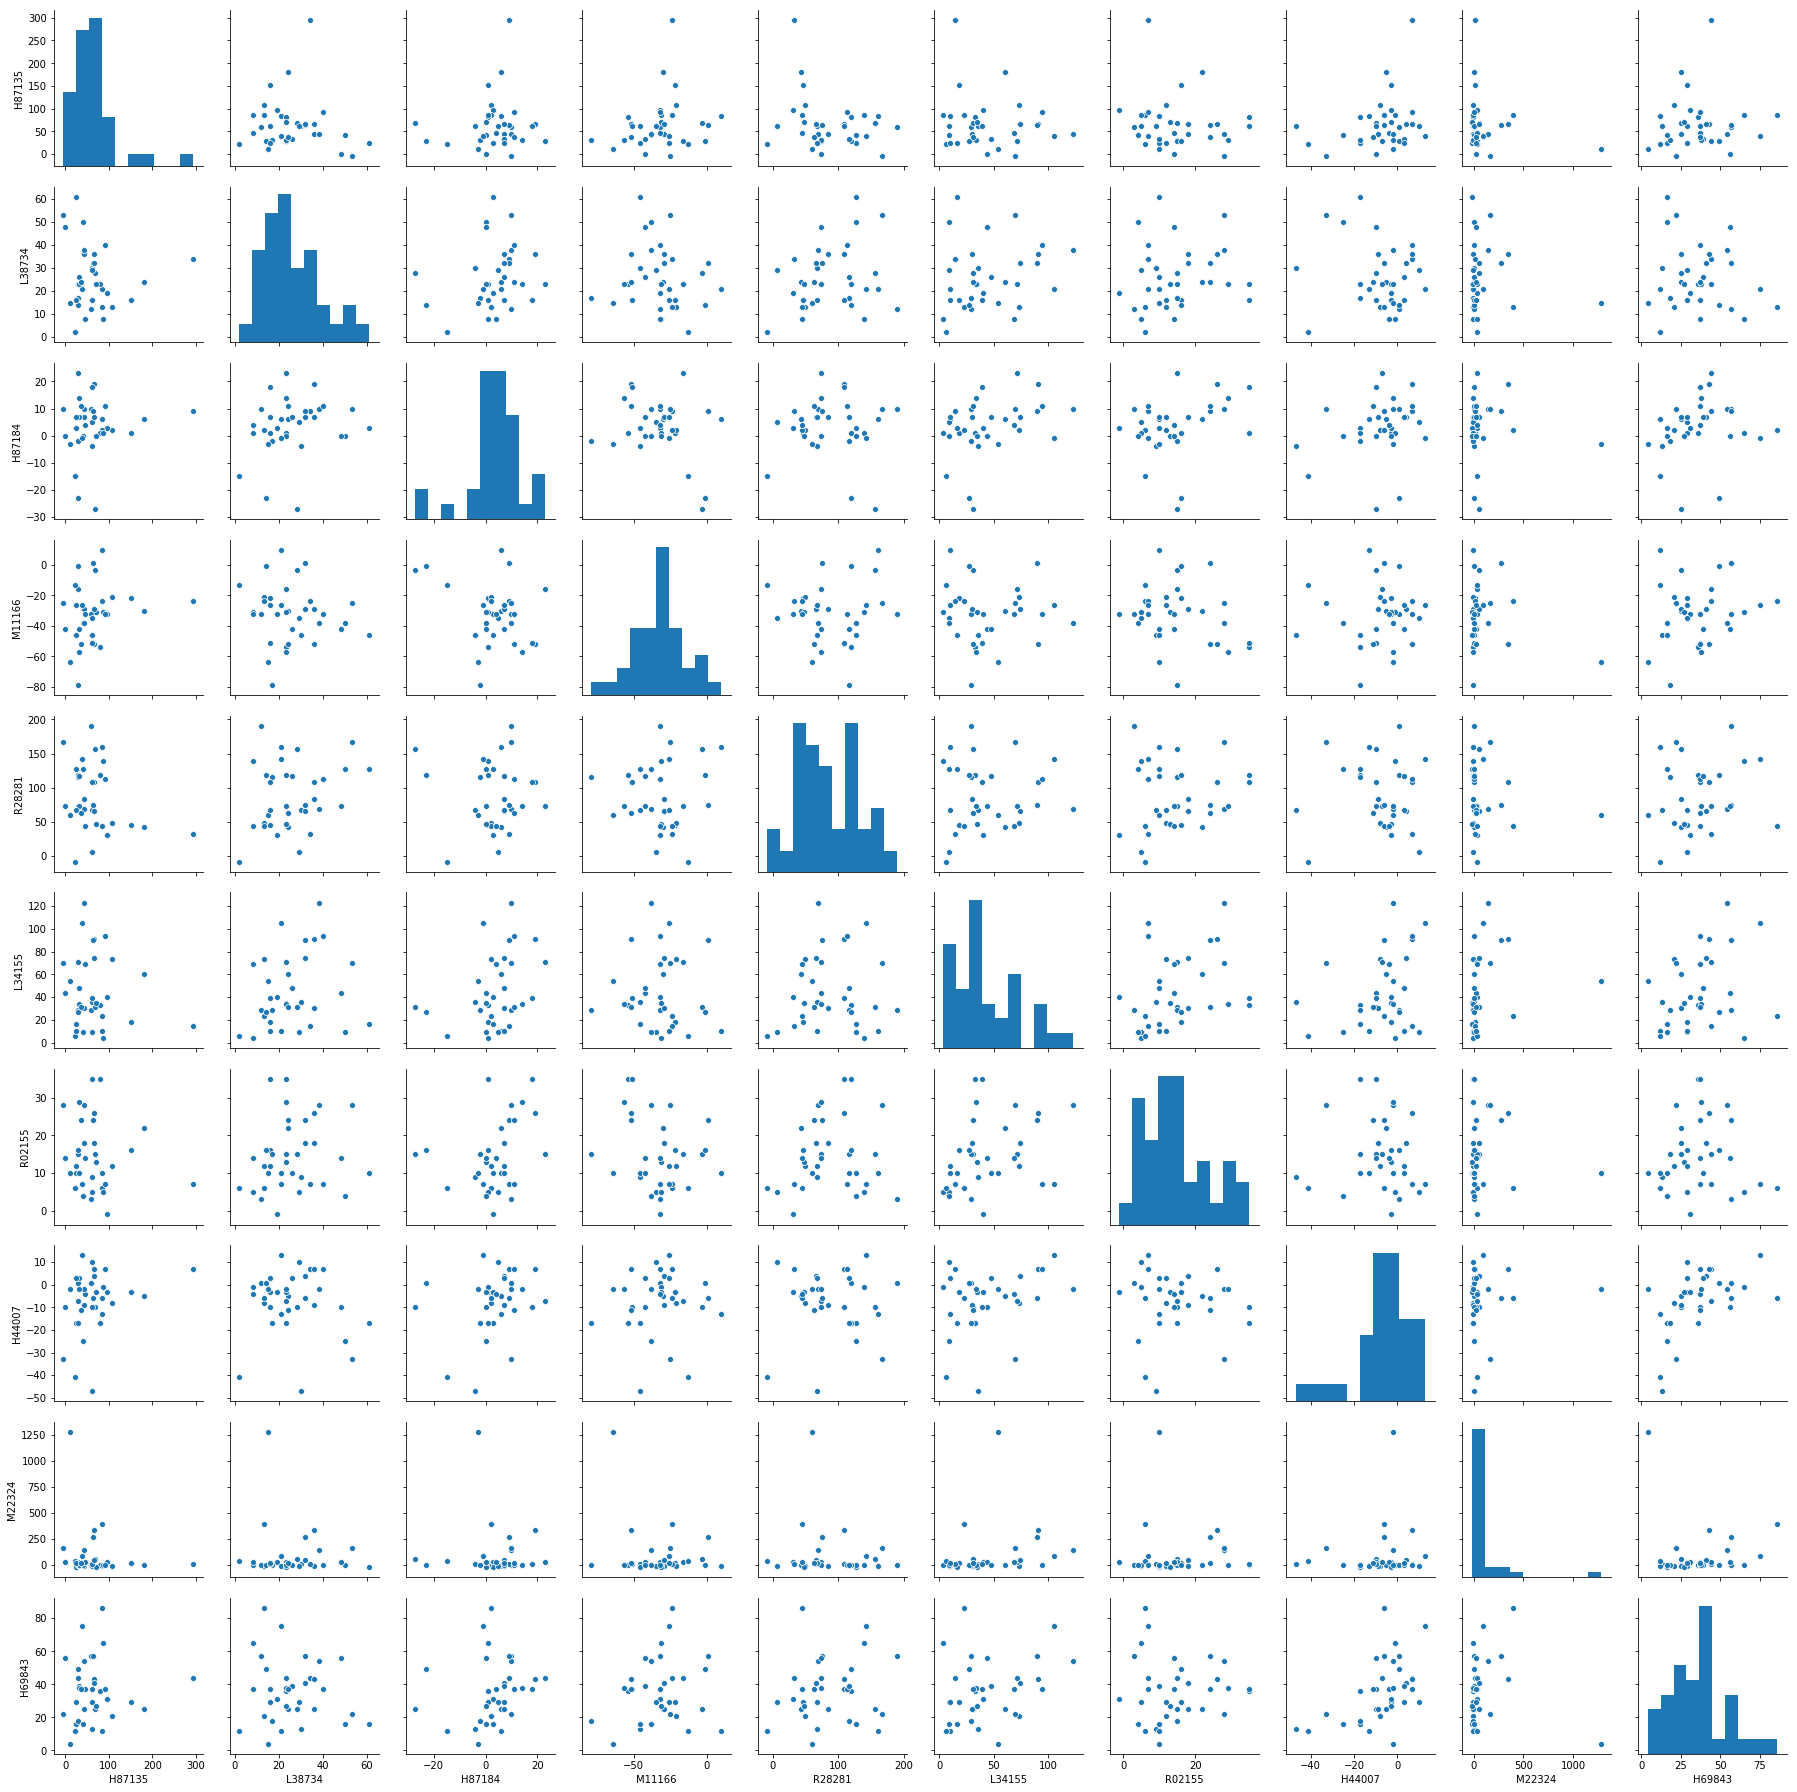

In [104]:
sns.pairplot(top_20_genes_expr)